In [1]:
import numpy as np
import sys
sys.path.append('../../python')
import plot_info
import matplotlib.pyplot as plt
plot_info.set_notebook_name('InitialData2D.ipynb')
np.random.seed(42)

# Kelvin-Helmholtz 2D

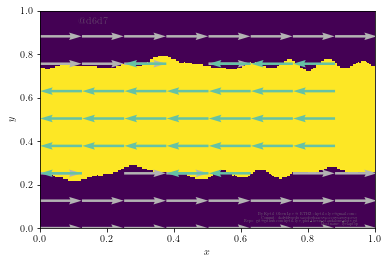

In [2]:
K = 10
N = 128
a1 = np.random.uniform(0,1, K)
a2 = np.random.uniform(0,1, K)
b1 = np.random.uniform(0,1, K)
b2 = np.random.uniform(0,1, K)

perturbation = 0.06
normalization1 = sum(a1)
if abs(normalization1) < 1e-10:
    normalization1 = 1
normalization2 = sum(a2)
if abs(normalization2) < 1e-10:
    normalization2 = 1

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)

X, Y =np. meshgrid(x, y)
X = X.T
Y = Y.T

perturbation_upper = 0.75 + perturbation*np.sum([a1[i]*np.cos(2*np.pi*(i+1)*(X+b1[i])) for i in range(len(a1))], 0)/normalization1
perturbation_lower = 0.25 + perturbation*np.sum([a2[i]*np.cos(2*np.pi*(i+1)*(X+b2[i])) for i in range(len(a2))], 0)/normalization2
middle = (Y < perturbation_upper)*(Y > perturbation_lower)

rho = 2.0 * middle + 1.0*(1-middle)
ux = -0.5*middle + 0.5*(1-middle)
uy = np.zeros_like(X)
p = 2.5*np.ones_like(X)


plt.pcolormesh(X, Y, rho)
plt.quiver(X[::16,::16], Y[::16,::16], ux[::16,::16], uy[::16,::16], -rho[::16,::16],
           scale=4, cmap='Set2')
plt.xlabel("$x$")
plt.ylabel("$y$")
plot_info.showAndSave(f'kelvinhelmholtz_initial')

# Richtmeyer-Meshkov 2D

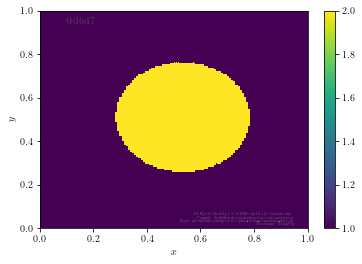

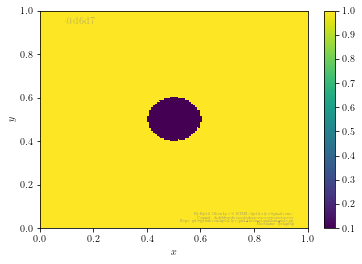

In [3]:
K = 10
N = 128
a1 = np.random.uniform(0,1, K)

b1 = np.random.uniform(0,1, K)

perturbation = 0.06
normalization = sum(a1)
if abs(normalization) < 1e-10:
    normalization = 1
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)

X, Y =np. meshgrid(x, y)
X = X.T
Y = Y.T

XC = X - 0.5
YC = Y - 0.5
phi = np.arctan2(YC, XC)*(abs(XC)>0)

phi[phi < 0] += 2*np.pi

perturbation = perturbation * np.sum([a1[n] * np.cos(phi+2*np.pi*b1[n]) for n in range(K)], axis=0) / normalization

r = np.sqrt((X-0.5)**2+(Y-0.5)**2)

middle_p = r < 0.1
p = middle_p * 0.1 + (1-middle_p)*1.0

middle_rho = r < 0.25 + perturbation

rho = middle_rho * 2.0 + (1-middle_rho)*1.0

ux = 0
uy = 0


plt.pcolormesh(X, Y, rho)
plt.colorbar()

plt.xlabel("$x$")
plt.ylabel("$y$")
plot_info.showAndSave(f'richtmeyermeshkov_initial_rho')


plt.pcolormesh(X, Y, p)
plt.colorbar()

plt.xlabel("$x$")
plt.ylabel("$y$")
plot_info.showAndSave(f'richtmeyermeshkov_initial_p')





# Cloudshock

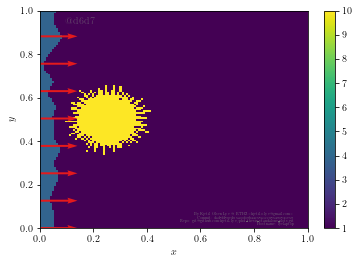

In [30]:
N=128
K = 10
a1 = np.random.uniform(0,1, K)
a2 = np.random.uniform(0,1, K)
b1 = np.random.uniform(0,1, K)
b2 = np.random.uniform(0,1, K)


perturbation = 0.06
normalization1 = sum(a1)
if abs(normalization1) < 1e-10:
    normalization1 = 1
normalization2 = sum(a2)
if abs(normalization2) < 1e-10:
    normalization2 = 1

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)

X, Y =np.meshgrid(x, y)


r = np.sqrt((X-0.25)**2 + (Y-0.5)**2)
phi = np.arctan2(X-0.25, Y - 0.5)
perturbation_x = perturbation*np.sum([a1[i]*np.cos(2*np.pi*(i+1)*(Y+b1[i])) for i in range(len(a1))], axis=0)/normalization1
perturbation_r = perturbation*np.sum([a2[i]*np.cos(2*np.pi*(i+1)*(phi+b2[i])) for i in range(len(a2))], axis=0)/normalization2

#
r_max = 0.13
left_x = (x < 0.05 + perturbation_x)
cloud = r < r_max + perturbation_r

rho = left_x*3.86859 + (1-left_x)*(cloud*10.0 + (1-cloud)*1.0)

ux = 11.2536*left_x
uy = np.zeros_like(ux)

p = 167.345*left_x + (1-left_x)*1.0

plt.pcolormesh(X, Y, rho)
plt.colorbar()
plt.quiver((left_x*X)[::16,::16], (left_x*Y)[::16,::16],
           (left_x*ux)[::16,::16], 
           (left_x*uy)[::16,::16], -(left_x*rho)[::16,::16],
           scale=80, cmap='Set1')


plt.xlabel("$x$")
plt.ylabel("$y$")
plot_info.showAndSave(f'cloudshock_initial_rho')

